In [6]:
import numpy as np
import numpy.linalg as la
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
M = np.loadtxt('Mat-M.txt')
K = np.loadtxt('Mat-K.txt')
G = np.loadtxt('Mat-G.txt')
C = np.loadtxt('Mat-C.txt')

In [8]:
#desbalanceamento residual maximo
U=1e-3 #[kg.m]
n=int(np.sqrt(np.size(M)))

#frequencias em Hz

def resposta_frequencia(w0, wf):
    Omega = np.linspace(w0,wf,100*(wf-w0))
    X = sp.zeros((len(Omega), n))
    for i in range(len(Omega)):
        w=Omega[i]
        F=U*w**2*np.ones(n)

        Z=-1*w**2*M+1j*w*(C+G*w)+K
        Zinv=la.inv(Z)

        Xt=Zinv @ F
        Xabs = np.absolute(Xt)
        X[i] = sp.transpose(Xabs)

    return Omega, X

In [9]:
w,x=resposta_frequencia(100,1000)
print(len(x[0,:]))

192


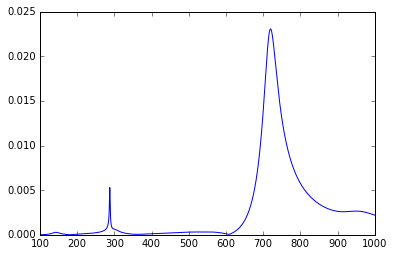

In [10]:
plt.plot(w, x[:,0])